# KIVA DATA ANALYSIS + INDIA'S STORY WITH NEIGHBOURS

In [99]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from plotly.offline import download_plotlyjs, iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.plotly as py
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

%matplotlib inline
plt.style.use('ggplot')

In [2]:
# Let's see the number of dataset and their name we have
try:
    dataset = os.listdir('input')
    for var in dataset:
        print(var)
except Exception as e :
    dataset = os.listdir('../input')
    for var in dataset:
        print(var)

kiva_loans.csv
kiva_mpi_region_locations.csv
loan_themes_by_region.csv
loan_theme_ids.csv


In [3]:
# loading datasets

try:
    df_kiva_loans = pd.read_csv('input/kiva_loans.csv')
    df_kiva_mpi = pd.read_csv('input/kiva_mpi_region_locations.csv')
    df_loan_region = pd.read_csv('input/loan_themes_by_region.csv')
    df_loan_ids = pd.read_csv('input/loan_theme_ids.csv')

except Exception as e:
    df_kiva_loans = pd.read_csv('../input/kiva_loans.csv')
    df_kiva_mpi = pd.read_csv('../input/kiva_mpi_region_locations.csv')
    df_loan_region = pd.read_csv('../input/loan_themes_by_region.csv')
    df_loan_ids = pd.read_csv('../input/loan_theme_ids.csv')

In [4]:
# let's see the kiva_loan dataset.
df_kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [5]:
# let's see the kiva_mpi_region_location dataset.
df_kiva_mpi.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [6]:
# let's see the kiva_loan_theme_id dataset.
df_loan_ids.head()

,id,Loan Theme ID,Loan Theme Type,Partner ID
0,638631,a1050000000skGl,General,151.0
1,640322,a1050000000skGl,General,151.0
2,641006,a1050000002X1ij,Higher Education,160.0
3,641019,a1050000002X1ij,Higher Education,160.0
4,641594,a1050000002VbsW,Subsistence Agriculture,336.0


In [7]:
# let's see the kiva_loan_theme_by_region dataset.

df_loan_region.head()

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,...,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0


#### Let's see the statistical information about numerical values

In [8]:

df_kiva_loans.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


#### Let's see the statistical information about categorical values

In [9]:
df_kiva_loans.describe(include=[np.object])

,activity,sector,use,country_code,country,region,currency,posted_time,disbursed_time,funded_time,tags,borrower_genders,repayment_interval,date
count,671205,671205,666973,671197,671205,614405,671205,671205,668809,622874,499789,666984,671205,671205
unique,163,15,424912,86,87,12695,67,667399,5719,498007,86719,11298,4,1298
top,Farming,Agriculture,to buy a water filter to provide safe drinking...,PH,Philippines,Kaduna,PHP,2017-05-15 00:00:00+00:00,2017-02-01 08:00:00+00:00,2016-09-21 13:03:24+00:00,user_favorite,female,monthly,2017-03-20
freq,72955,180302,5217,160441,160441,10000,160440,25,2800,33,27088,426502,342717,1308


#### Let's get the information about the missing values.

In [10]:

null = df_kiva_loans.isnull().sum()
null_per = (null/len(df_kiva_loans))*100
null_per = pd.DataFrame(data={'Columns':null.index,'Number of Null values':null.values, 'Percentage of null value':null_per.values})
null_per

,Columns,Number of Null values,Percentage of null value
0,id,0,0.000000
1,funded_amount,0,0.000000
2,loan_amount,0,0.000000
3,activity,0,0.000000
4,sector,0,0.000000
5,use,4232,0.630508
6,country_code,8,0.001192
7,country,0,0.000000
8,region,56800,8.462392
9,currency,0,0.000000


* As one can see 25% null values, which is maximum, is in tags column.
* Other columns have less than 10% null values.
* No need to remove null values.

#### =====================================================================================================

# LOAN ANALYSIS

### Q1). Top 10 Countires that got maximum number of times Loan.

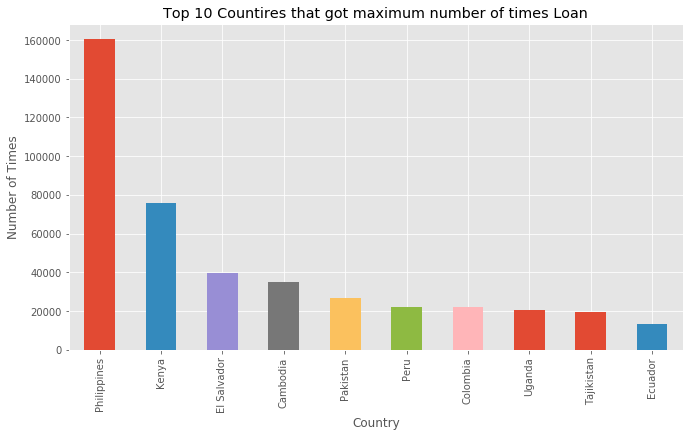

In [11]:

df_kiva_loans['country'].value_counts()[:10].plot(kind='bar', figsize=(11,6))
plt.title('Top 10 Countires that got maximum number of times Loan')
plt.xlabel('Country')
plt.ylabel('Number of Times')
plt.show()

* As one can see Philippines got maximum number of times loan followed by Kenya and then by El Salvador.
* India's neighbourer Pakisthan is also in the list at 5th position.


#### =====================================================================================================

### Q2). Let's create wordcloud for the countries according to the number of times they got loan.

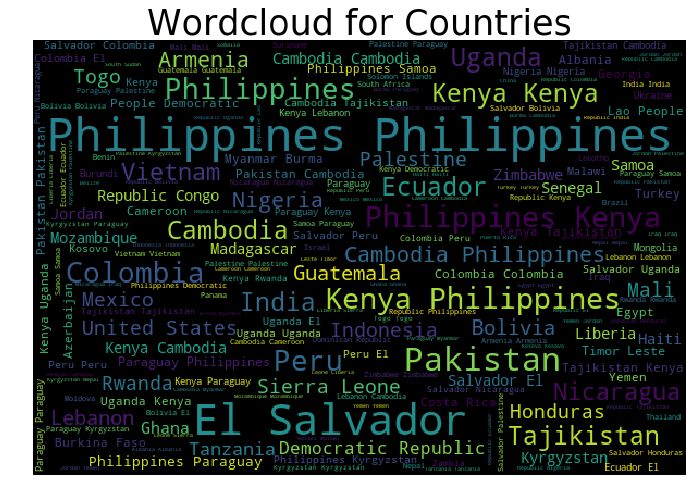

In [12]:
from wordcloud import WordCloud

names = df_kiva_loans['country'][pd.notnull(df_kiva_loans['country'])]
wc = WordCloud(width=600, height=400, max_font_size=50).generate(' '.join(names))
plt.figure(figsize=(16,8))
plt.title('Wordcloud for Countries', fontsize=35)
plt.imshow(wc)
plt.axis('off')
plt.show()

#### ====================================================================================================

### Q3). Top 10 Countries that got maximum amount of total loan.


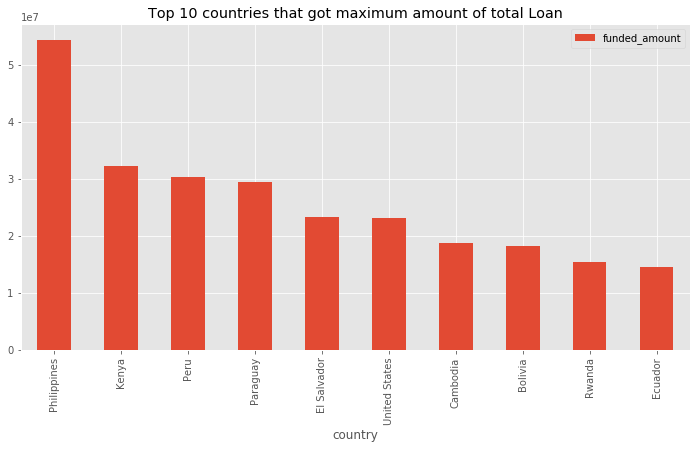

In [44]:
# Using groupby function here.
country = df_kiva_loans.groupby('country')['funded_amount'].sum().reset_index()
country.sort_values('funded_amount',ascending=False, inplace=True)
country = country[:10]
country.set_index('country', drop=True, inplace=True,)

country.plot(kind='bar', figsize=(12,6), title='Top 10 countries that got maximum amount of total Loan')

plt.show()

#### ==================================================================================================

### Q4). Top 10 Sectors that got maximum amount of total loan.

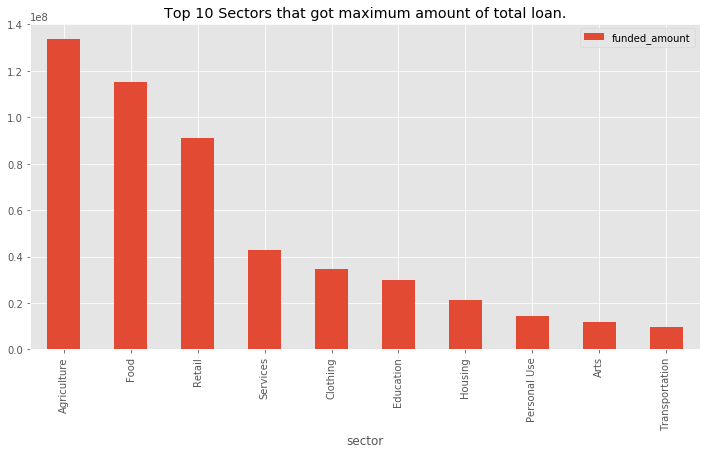

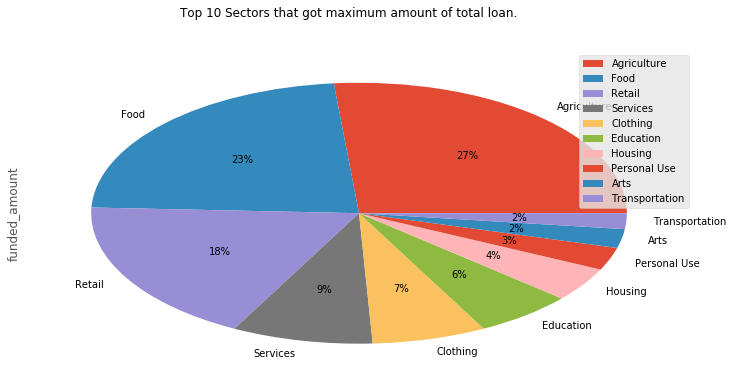

In [45]:
# Using groupby function here.

sector = df_kiva_loans.groupby('sector')['funded_amount'].sum().reset_index()
sector.sort_values('funded_amount',ascending=False, inplace=True)
sector = sector[:10]
sector.set_index('sector', drop=True, inplace=True,)


sector.plot(kind='bar',title='Top 10 Sectors that got maximum amount of total loan.', figsize=(12,6))
plt.show()
sector.plot(kind='pie',title='Top 10 Sectors that got maximum amount of total loan.',subplots=True, 
            figsize=(12,6), autopct='%.f%%') 
plt.show()

#### ====================================================================================================

### Q5). Top 10 Activity that got maximum amount of total loan.

In [94]:
# Using groupby function here.

activity = df_kiva_loans.groupby('activity')['funded_amount'].sum().reset_index()
activity.sort_values('funded_amount',ascending=False, inplace=True)
activity = activity[:10]

# iplot for interactive plots.
activity.iplot(kind='bar',x='activity', y='funded_amount',
             title='Top 10 activity that got maximum amount of total loan.', xTitle='activity', yTitle='Amount' )
plt.show()
activity.iplot(kind='pie',title='Top 10 activity that got maximum amount of total loan.',
             labels='activity', values='funded_amount', pull=0.2, hole=0.2) 
plt.show()

* Maximum number of activities are related to farming and agriculture.


#### =====================================================================================================

### Q6). Loan Amount Distribution.

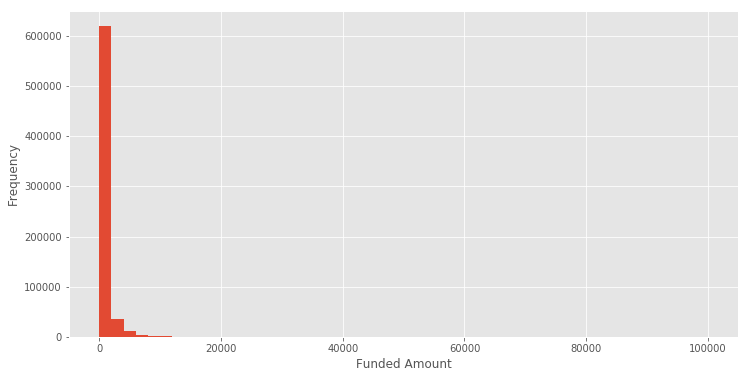

In [66]:
df_kiva_loans['funded_amount'].plot(kind='hist', bins=50, figsize=(12,6))
plt.xlabel('Funded Amount')
plt.show()

#### The conclusions from the graph:- 
* As one can see there are some outliers in the distribution of funded amount.
* First we will remove this outliers.
* We will take funded amount in the range of 0 to 10000 dollar to see the distribution of funded amount.

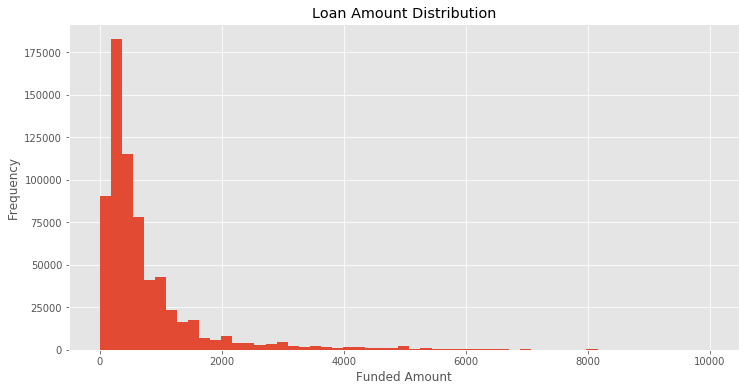

In [60]:
temp_df = df_kiva_loans[df_kiva_loans['funded_amount']<10000]
temp_df['funded_amount'].plot(kind='hist', figsize=(12,6), bins=55)
plt.xlabel('Funded Amount')
plt.title('Loan Amount Distribution')
plt.show()

* From this interactive graph one can say maximum number of times loans are in the range of 200 to 300 dollars.

#### ====================================================================================================

### 7). Let's get insight about the Repayment interval of loans.

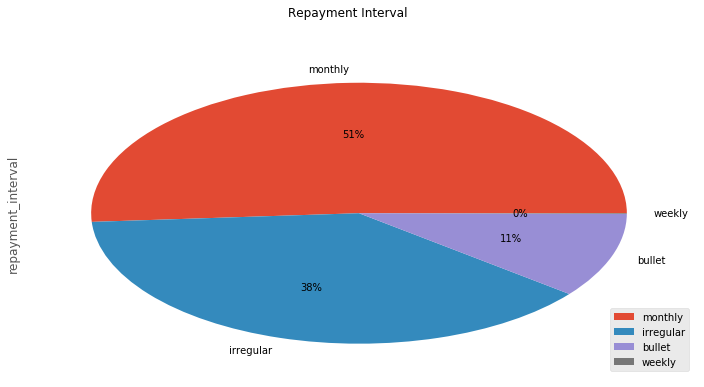

In [55]:
new_df = df_kiva_loans['repayment_interval'].value_counts().reset_index()
new_df.set_index('index', inplace=True, drop=True)
new_df.plot(kind='pie', subplots=True, title='Repayment Interval', autopct='%.f%%', figsize=(12,6))
plt.show()

* 51% are related to monthlt interval followed by 38% from irregular.

#### ====================================================================================================

### Q8). Let's get information about the lender count.
#### lender count = number of lender giving loan to a borrower.

* Maximum number of lenders are in the range of 0 to 200, so I am only checking the distribution of those only.
* Others may be treated as outliers.

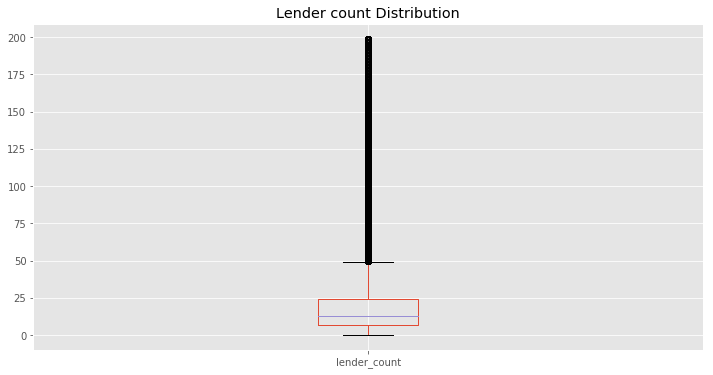

In [48]:
lender = df_kiva_loans[df_kiva_loans['lender_count']<200]
lender['lender_count'].plot(kind='box', figsize=(12,6), title='Lender count Distribution')
plt.show()

#### ====================================================================================================

### Q9). Gender Distribution of Borrower.

In [72]:
gender = df_kiva_loans['borrower_genders'].value_counts()[:2].reset_index()
gender.iplot(kind='pie', labels='index', values='borrower_genders')
plt.show()

* Participation of females much higher than males.
* Female with 76% and male with 24%

#### ====================================================================================================

### Q10). For which durations(month) maximum number of loans are there.

In [88]:
months = df_kiva_loans['term_in_months'].value_counts()[:10].reset_index()
 
months.columns = ['Terms in Months','Frequency']
months.iplot(kind='bar', x='Terms in Months', y= 'Frequency')

* Maximum Number of times terms of loan is 14 or 8 in months.
* Approximately for 1 year.

#### ===================================================================================================

# MPI ANALYSIS

### Q11). Top 10 Countries with highest MPI (Multidimentional Poverty Index).

In [91]:
high_mpi = df_kiva_mpi.sort_values('MPI', ascending=False)[:10]
high_mpi.iplot(kind='bar', x='LocationName', y='MPI')

* High MPI means high Poverty.
* 6 regions from Chad are in high MPI means they are highly poor regions.


#### =====================================================================================================

### Q12). Top 10 Countries with low MPI (Multidimentional Poverty Index).

In [92]:
low_mpi = df_kiva_mpi.sort_values('MPI', )[:10]
low_mpi.iplot(kind='bar', x='LocationName', y='MPI')

#### ====================================================================================================

### Q13). MPI on World Map.

In [135]:
data = [{'lat': df_kiva_mpi['lat'] ,
  'lon': df_kiva_mpi['lon'] ,       
  'marker': {'color': df_kiva_mpi['MPI'] ,
   'line': {'color': 'rgb(40,40,40)', 'width': 0.5},
   'size': 5,
   'sizemode': 'diameter',
    'colorbar': dict(
            title = 'MPI', 
            thickness = 10,           
            outlinecolor = "rgba(68, 68, 68, 0)",            
            ticklen = 3,                       
            dtick = 0.1      )        },
  'text': df_kiva_mpi['LocationName'].astype(str) + '  ->  ' + df_kiva_mpi['MPI'].astype(str) + '  MPI' ,
  'type': 'scattergeo',
  
      }]


layout = go.Layout(
    title = 'MPI',
    showlegend = True,
    geo = dict(
            scope='world',
            projection=dict( type = 'natural earth'),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),)

fig =  go.Figure(layout=layout, data=data)
iplot( fig, validate=False)

#### ===================================================================================================

# TIME ANALYSIS

### Q 14). Time Series Analysis of funded amount.

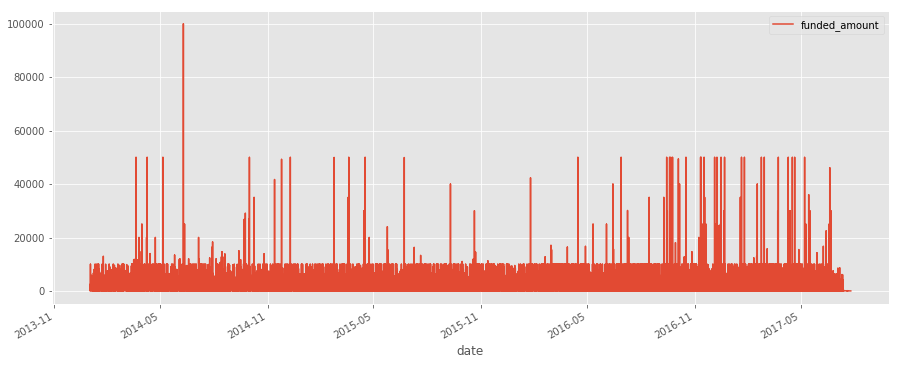

In [183]:
df_kiva_loans['date'] = pd.to_datetime(df_kiva_loans['date'])
temp_df = df_kiva_loans[['date','funded_amount']]
temp_df.set_index('date', drop=True, inplace=True)
temp_df.plot(figsize=(15,6))
plt.show()

#### =====================================================================================================

# INDIA AND IT'S NEIGHBOURS ANALYSIS